In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [83]:
# Load dataset
file_path = "C:\\Users\\TRINAVA\\Downloads\\Mall_Customers.csv"
data = pd.read_csv(file_path)

In [84]:


# Data Preprocessing
data = data.rename(columns={"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Spending_Score"})

# Selecting relevant features
X = data[["Annual_Income", "Spending_Score"]]


In [85]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [87]:
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [88]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

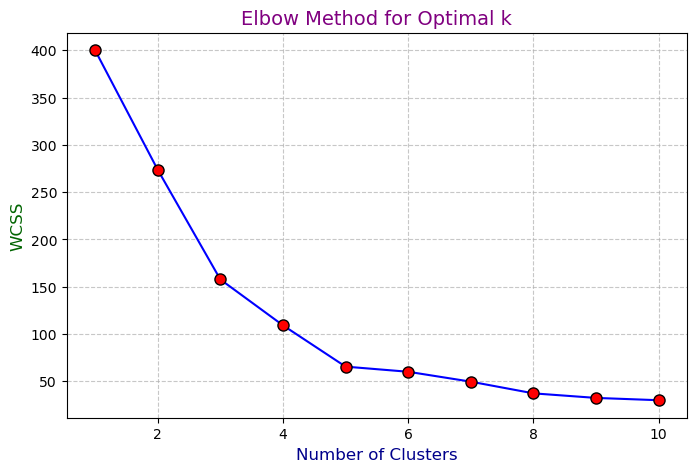

In [89]:
# K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markerfacecolor='r', markeredgecolor='k', markersize=8)
plt.xlabel('Number of Clusters', fontsize=12, color='darkblue')
plt.ylabel('WCSS', fontsize=12, color='darkgreen')
plt.title('Elbow Method for Optimal k', fontsize=14, color='purple')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


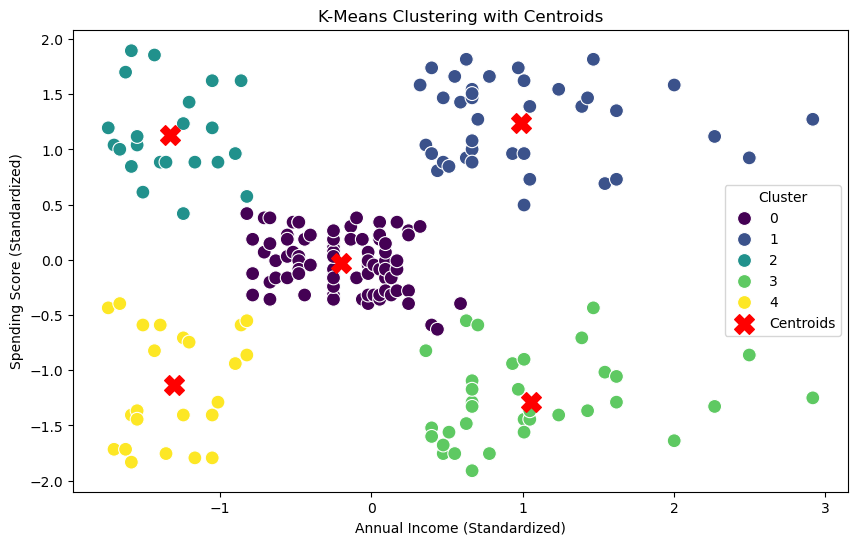

In [90]:
# Applying K-Means with optimal k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = kmeans_labels
centroids = kmeans.cluster_centers_


# Visualizing K-Means Clusters with Centroids
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('K-Means Clustering with Centroids')
plt.legend(title='Cluster')
plt.show()


In [91]:
# Print centroid values (before inverse transforming if scaled)
centroids = kmeans.cluster_centers_
print("Centroid values (Standardized Scale):")
print(centroids)

# Convert centroids back to original scale
centroids_original = scaler.inverse_transform(centroids)
print("\nCentroid values (Original Scale - Annual Income & Spending Score):")
print(centroids_original)

Centroid values (Standardized Scale):
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Centroid values (Original Scale - Annual Income & Spending Score):
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


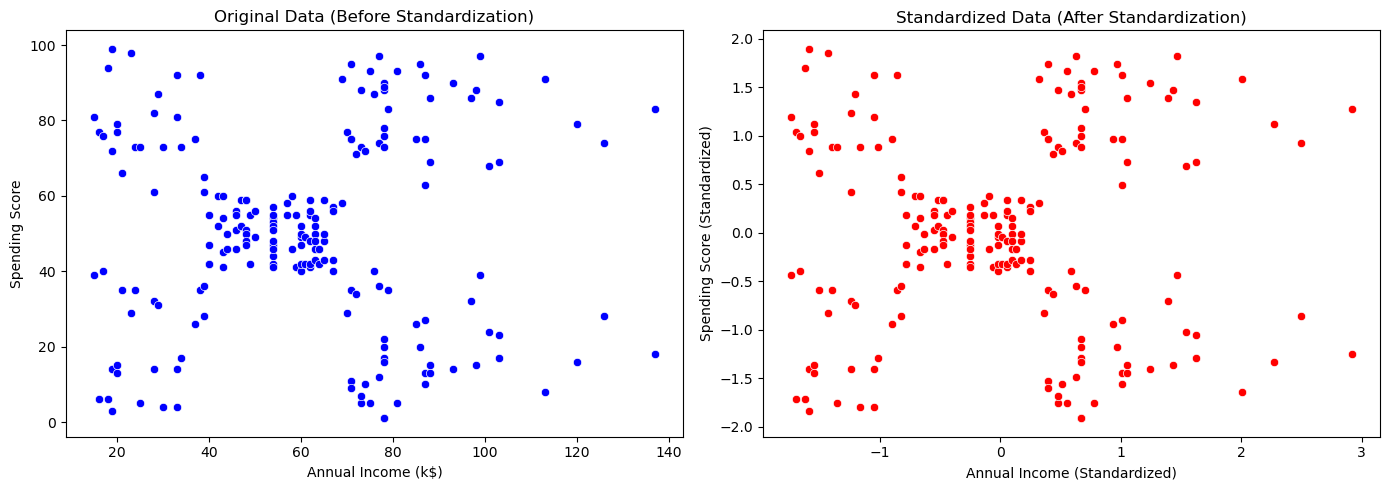

In [92]:
# Visualizing the Original vs. Standardized Data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original Data Scatter Plot
sns.scatterplot(x=data["Annual_Income"], y=data["Spending_Score"], ax=axes[0], color='blue')
axes[0].set_title("Original Data (Before Standardization)")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score")

# Standardized Data Scatter Plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], ax=axes[1], color='red')
axes[1].set_title("Standardized Data (After Standardization)")
axes[1].set_xlabel("Annual Income (Standardized)")
axes[1].set_ylabel("Spending Score (Standardized)")

plt.tight_layout()
plt.show()

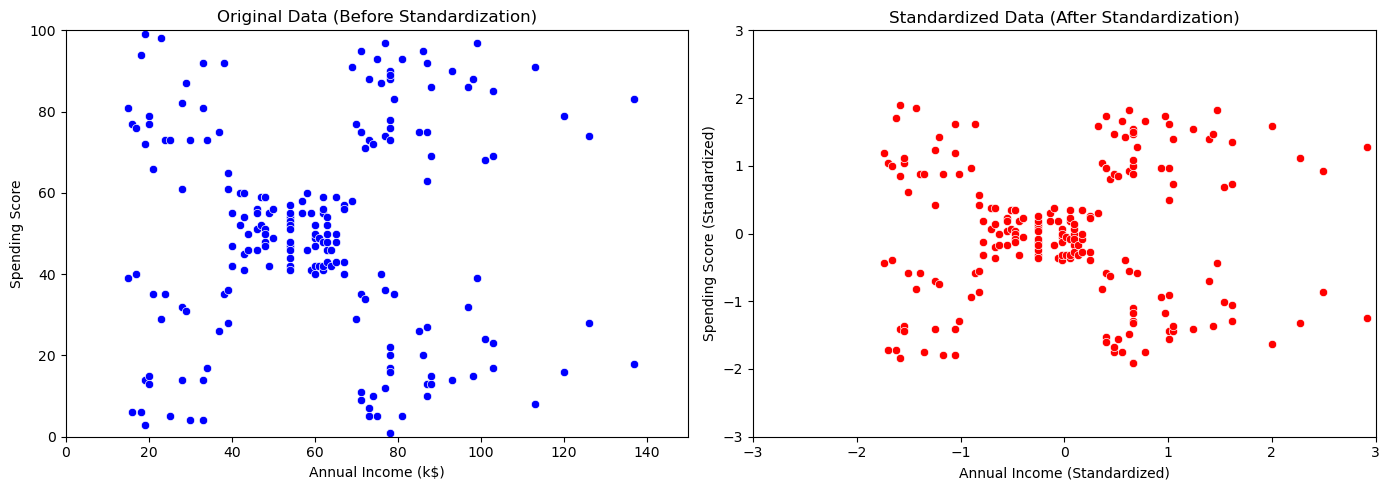

In [93]:
# Visualizing the Original vs. Standardized Data with Clearer Scales
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original Data Scatter Plot
sns.scatterplot(x=data["Annual_Income"], y=data["Spending_Score"], ax=axes[0], color='blue')
axes[0].set_title("Original Data (Before Standardization)")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score")
axes[0].set_xlim([0, 150])  # To make sure the axis is consistent
axes[0].set_ylim([0, 100])

# Standardized Data Scatter Plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], ax=axes[1], color='red')
axes[1].set_title("Standardized Data (After Standardization)")
axes[1].set_xlabel("Annual Income (Standardized)")
axes[1].set_ylabel("Spending Score (Standardized)")
axes[1].set_xlim([-3, 3])  # Standardized data typically ranges from -3 to 3
axes[1].set_ylim([-3, 3])

plt.tight_layout()
plt.show()


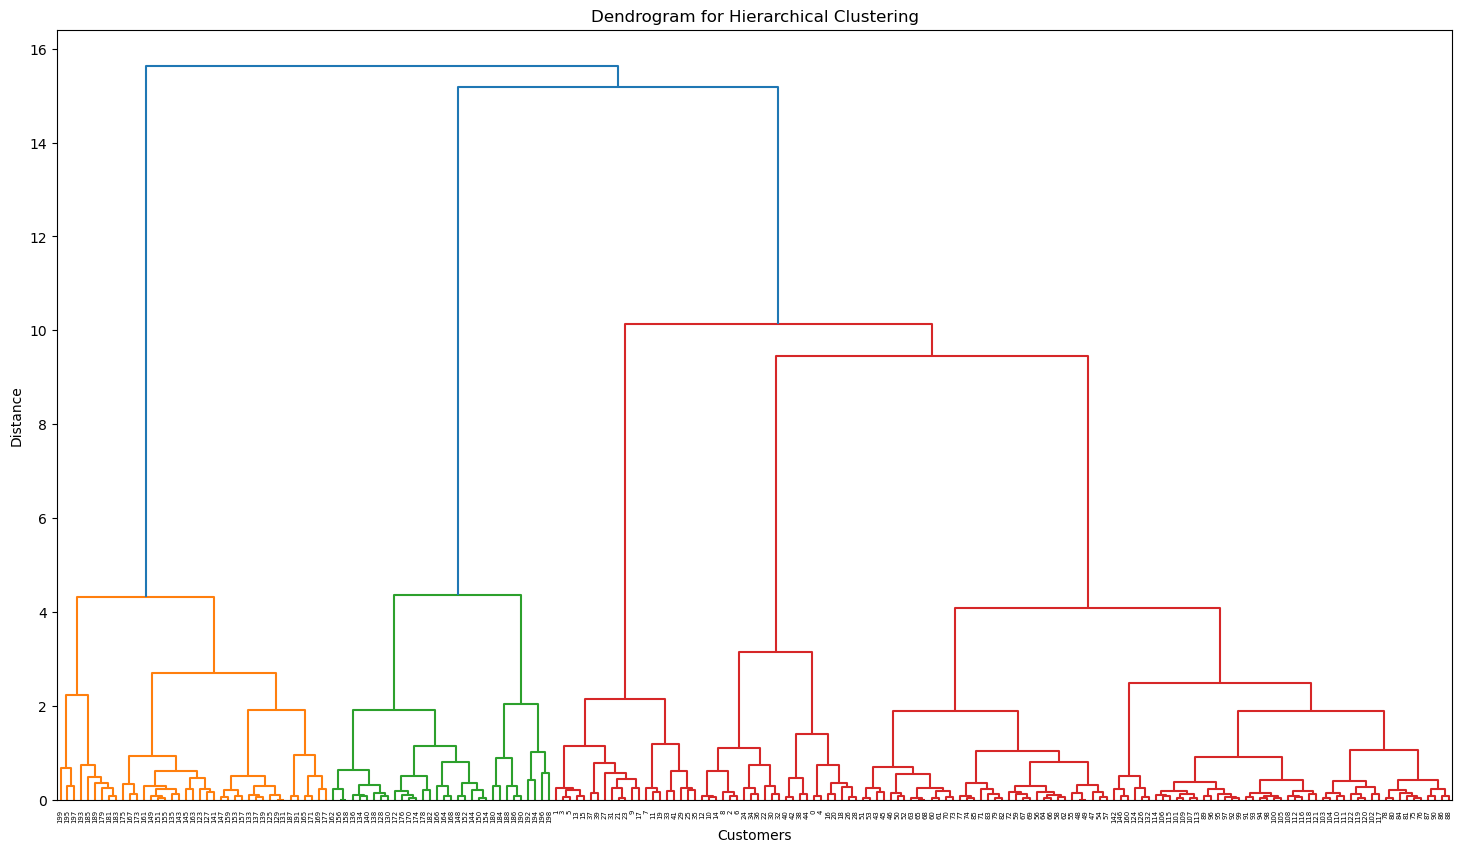

In [102]:
# Hierarchical Clustering
plt.figure(figsize=(18, 10))  # Increased figure size
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


# Applying Hierarchical Clustering with k=5
hier_clusters = fcluster(linkage(X_scaled, method='ward'), 5, criterion='maxclust')
data['Hierarchical_Cluster'] = hier_clusters


In [107]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster

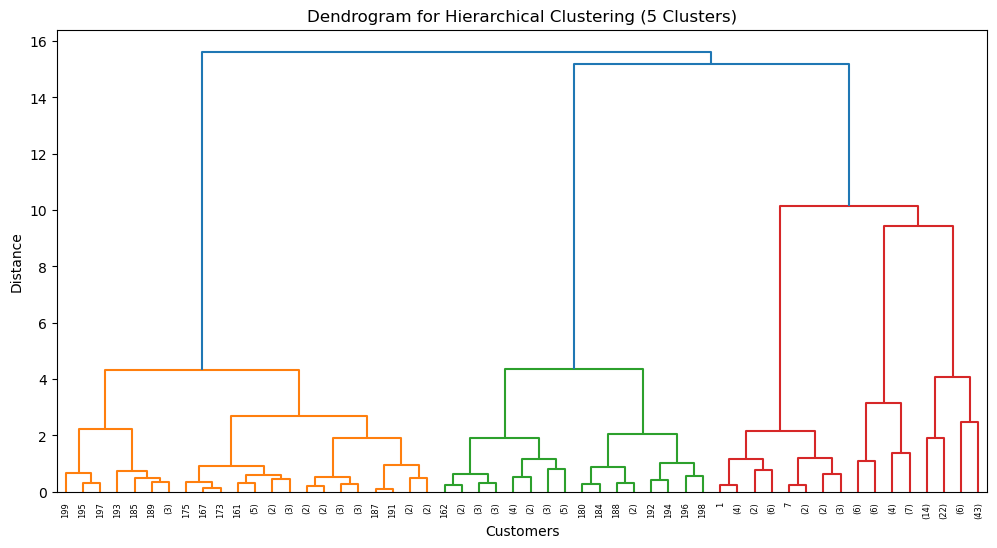

In [108]:
# Hierarchical Clustering Dendrogram
plt.figure(figsize=(12, 6))  # Adjusted figure size for better readability
linkage_matrix = linkage(X_scaled, method='ward')  # Creating the linkage matrix
dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)  # Shows only 5 levels

plt.title('Dendrogram for Hierarchical Clustering (5 Clusters)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Applying Hierarchical Clustering with k=5
hier_clusters = fcluster(linkage_matrix, 5, criterion='maxclust')  # Assigning 5 clusters
data['Hierarchical_Cluster'] = hier_clusters  # Storing clusters in dataframe

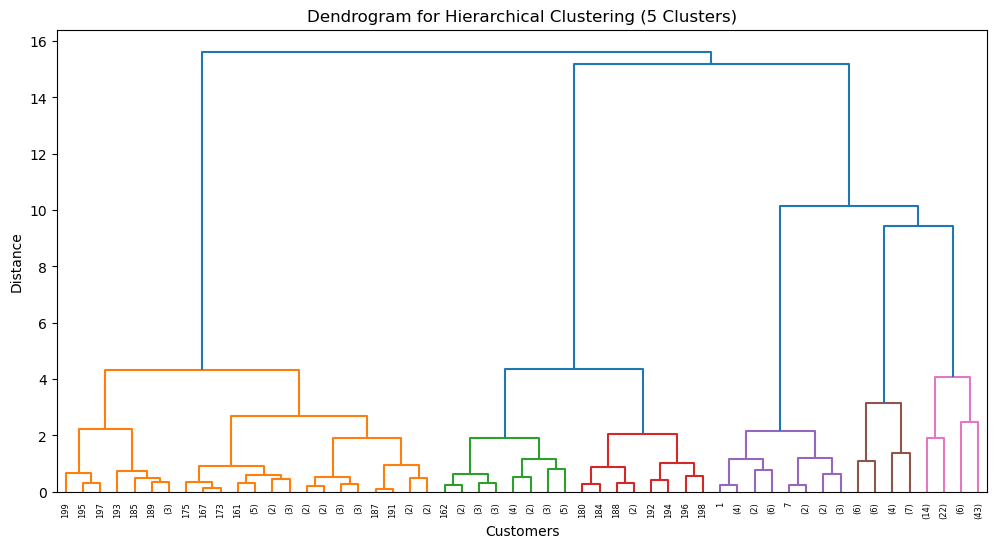

In [109]:
# Generate Linkage Matrix
linkage_matrix = linkage(X_scaled, method='ward')

# Plot Dendrogram with 5 colors for clusters
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(
    linkage_matrix, 
    truncate_mode='level', p=5,  # Limiting to 5 levels
    color_threshold=linkage_matrix[-5, 2]  # Set color threshold to form 5 clusters
)

plt.title('Dendrogram for Hierarchical Clustering (5 Clusters)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Assigning clusters (k=5)
hier_clusters = fcluster(linkage_matrix, 5, criterion='maxclust')
data['Hierarchical_Cluster'] = hier_clusters  # Storing clusters in dataframe

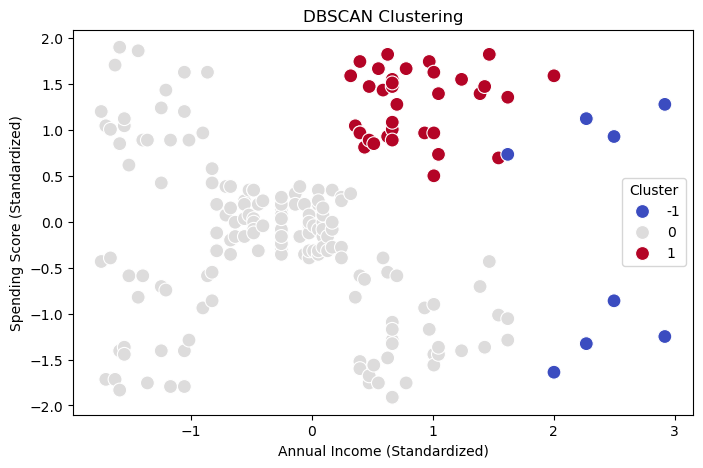

In [81]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = dbscan_labels 

# Visualizing DBSCAN Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='coolwarm', s=100)
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('DBSCAN Clustering')
plt.legend(title='Cluster')
plt.show()



In [45]:
# Silhouette Scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hier_silhouette = silhouette_score(X_scaled, hier_clusters)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A"
print(f'Silhouette Score - KMeans: {kmeans_silhouette}')
print(f'Silhouette Score - Hierarchical: {hier_silhouette}')
print(f'Silhouette Score - DBSCAN: {dbscan_silhouette}')

# Display cluster distributions
distribution = data[["KMeans_Cluster", "Hierarchical_Cluster", "DBSCAN_Cluster"]].apply(pd.Series.value_counts)
print(distribution)


Silhouette Score - KMeans: 0.5546571631111091
Silhouette Score - Hierarchical: 0.5538089226688662
Silhouette Score - DBSCAN: 0.35044619989666004
    KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster
-1             NaN                   NaN             8.0
 0            81.0                   NaN           157.0
 1            39.0                  39.0            35.0
 2            22.0                  32.0             NaN
 3            35.0                  21.0             NaN
 4            23.0                  23.0             NaN
 5             NaN                  85.0             NaN


<Figure size 1000x600 with 0 Axes>

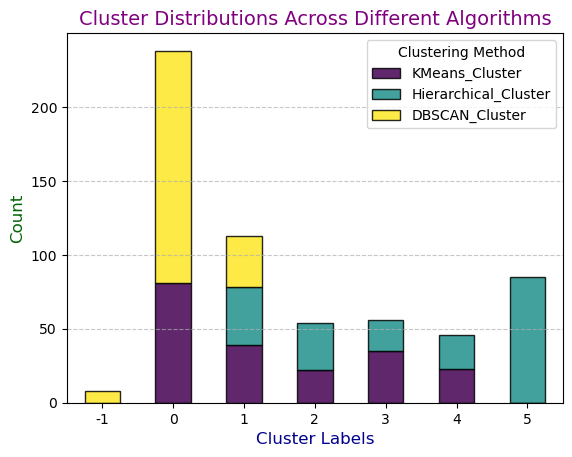

In [46]:
# Plot the cluster distributions
plt.figure(figsize=(10,6))
distribution.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', alpha=0.85)

# Formatting the plot
plt.xlabel("Cluster Labels", fontsize=12, color="darkblue")
plt.ylabel("Count", fontsize=12, color="darkgreen")
plt.title("Cluster Distributions Across Different Algorithms", fontsize=14, color="purple")
plt.xticks(rotation=0)
plt.legend(title="Clustering Method")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [27]:
styled_table = distribution.style.set_caption("Cluster Distributions Across Algorithms") \
    .set_table_styles([{'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold')]}]) \
    .background_gradient(cmap="coolwarm") \
    .set_properties(**{"text-align": "center", "font-size": "12px"})

display(styled_table)

,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
-1,nan,nan,8.000000
0,81.000000,nan,157.000000
1,39.000000,39.000000,35.000000
2,22.000000,32.000000,nan
3,35.000000,21.000000,nan
4,23.000000,23.000000,nan
5,nan,85.000000,nan


C:\Users\TRINAVA\AppData\Local\Temp\ipykernel_11056\3758315518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['KMeans_Cluster'], ax=axes[0], palette='viridis')
C:\Users\TRINAVA\AppData\Local\Temp\ipykernel_11056\3758315518.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Hierarchical_Cluster'], ax=axes[1], palette='coolwarm')
C:\Users\TRINAVA\AppData\Local\Temp\ipykernel_11056\3758315518.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['DBSCAN_Cluster'], ax=axes[2], palette='Set2')


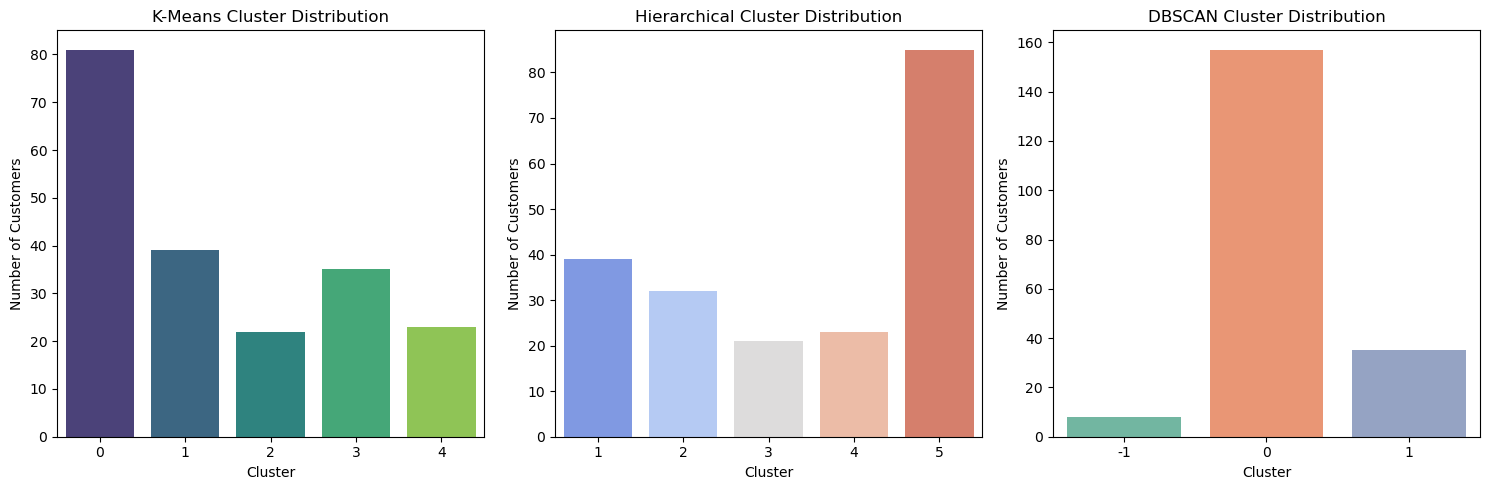

In [47]:
# Graphical Representation of Cluster Distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=data['KMeans_Cluster'], ax=axes[0], palette='viridis')
axes[0].set_title('K-Means Cluster Distribution')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Number of Customers')

sns.countplot(x=data['Hierarchical_Cluster'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Hierarchical Cluster Distribution')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Customers')

sns.countplot(x=data['DBSCAN_Cluster'], ax=axes[2], palette='Set2')
axes[2].set_title('DBSCAN Cluster Distribution')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


In [55]:
styled_table = data.describe().style.set_properties(**{'background-color': 'khaki',  
                                                       'color': 'black',
                                                       'border-color': 'black'})
display(styled_table)

,CustomerID,Age,Annual_Income,Spending_Score,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.400000,3.415000,0.135000
std,57.879185,13.969007,26.264721,25.823522,1.449311,1.611134,0.444706
min,1.000000,18.000000,15.000000,1.000000,0.000000,1.000000,-1.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000,2.000000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000,4.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000,5.000000,0.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000,5.000000,1.000000
